# Descenso del gradiente

## Tarea

Crear el modelo que separe a los dos circulos que se presentan a continuación usando regresión logística

In [47]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets        import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

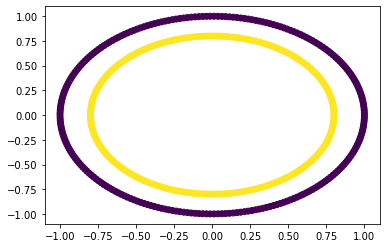

In [3]:
C,c = make_circles(500, random_state=1234) 

plt.scatter(C[:,0],C[:,1],c=c)

En la imagen se pueden ver dos clases pero, al menos ahí, no hay forma de que una línea  pueda separarlos, entonces los voy a transformar usando coordenadas polares.

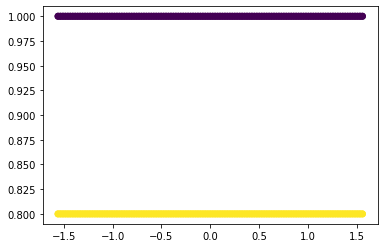

In [70]:
Xu = np.zeros_like(C)
Xu[:,0], Xu[:,1] = np.arctan(C[:,1]/C[:,0]), np.linalg.norm(C,axis=1)
plt.scatter(Xu[:,0], Xu[:,1], c=c)

Ahora el arreglo `Xu` son los círculos reexpresados en estas coordenadas.

In [72]:
def gradiente(w,X,y):
    h = sigmoide(np.dot(X,w))
    z = h.T - y
    gr = np.dot(X.T, z.T)
    return gr

sigmoide = lambda z: 1/(1 + np.exp(-z))
loglikelihood = lambda H,y: (-np.dot(y,np.log(H)) - np.dot((1-y),np.log(1-H))).sum()

def grad_desc(X,y,iters, a=0.01,t=100, tol=1e-4):
    #gr = lambda w, X, y: dot(X.T, (sigmoide(w.T,X.T) - y).T)
    n, d = X.shape
    #print(n,d)
    pesos = np.random.ranf((1,d))
    w = pesos[-1]
    #print(w)
    h  = sigmoide(np.dot(X,w))
    j  = loglikelihood(h,y)
    costos = [j]
    for i in range(iters):
        gr = gradiente(w,X,y)
        w -= a*gr
        pesos  = np.vstack((pesos,w))
        h  = sigmoide(np.dot(X,w))
        j  = loglikelihood(h,y)
        costos.append(j)
        if(i%t==0 or j < tol):
            print('{0}:{1}'.format(i,j))
        if(j<tol):
            break
    return w, pesos, costos

In [89]:
Xb = np.hstack((np.ones(len(Xu)).reshape(-1,1), Xu ))
Ct, Cp, ct, cp = train_test_split(Xb, c)
wf, W, J = grad_desc(Ct,ct,2000,0.1, t=1000)

0:3460.222379935722
1000:0.03479402353704685


In [90]:
Xu.shape

(500, 2)

El error al final del entrenamiento fue:

In [91]:
J[-1]

0.03412695467963767

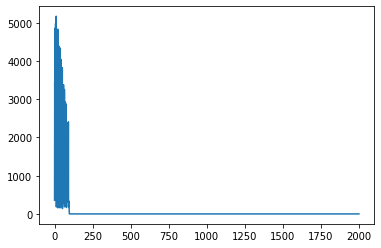

In [92]:
plt.plot(J)

Ahora podemos evaluar nuestro modelo en el conjunto de prueba

In [93]:
h = sigmoide(np.dot(Cp,wf))
print(np.round(h))

[0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0.]


In [94]:
confusion_matrix(np.round(h), cp)

array([[60,  0],
       [ 0, 65]])

In [95]:
loglikelihood(h, cp)

0.011457140417209228

Como tiene un error aceptable entonces podemos confiar en usarlo como una máquina de clasificación de estímulos no vistos.

Como nuestro problema requirió que transformaramos los datos, entonces requerimos transformarlos primero para luego pasarlos al clasificador. Para eso vamos a usar la función `trans`

    funcion trans(p,q):
        

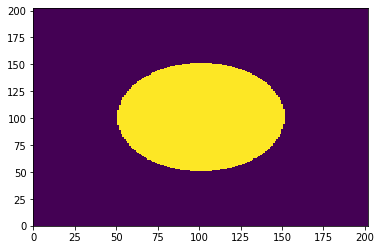

In [97]:
P = np.arange(-1.01,1.01,0.01)
Q = np.arange(-1.01,1.01,0.01)
Z = np.zeros((len(P),len(Q)))

def trans(p,q):
    try:
        return np.array([1,np.arctan(q/p),np.linalg.norm( np.array([p,q]) )])
    except:
        if(p==0):
            return np.array( [1,0,0] )
        
for p in range(len(P)):
    for q in range(len(Q)):
        x,y = P[p], Q[q]
        sc = np.dot(trans(x,y),wf)
        #print(sc)
        Z[p,q] = np.round(int(sigmoide( sc )) )
plt.pcolor(Z)

El cuadro amarillo interpreta todo al interior de él como un 1 y afuera como un 0.